<a href="https://colab.research.google.com/github/HuseyinAts/Acikhack2023_TrendMiner/blob/main/preprocessed_with_turkish_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%bash
#!/usr/bin/env bash

echo "Update environment..."
apt update -q  &> /dev/null 

echo "Install Java..." 
apt-get install -q openjdk-11-jdk-headless &> /dev/null

echo "Install Jupyter java kernel..."
curl -L https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip \
 -o ijava-kernel.zip &> /dev/null

unzip -q ijava-kernel.zip -d ijava-kernel \
 && cd ijava-kernel \
 && python3 install.py --sys-prefix &> /dev/null
 
echo "Install proxy for the java kernel"
# NOTE: required after changes to Google Colab defaults in Dec. 2022
# See https://stackoverflow.com/questions/74674688/google-colab-notebook-using-ijava-stuck-at-connecting-after-installation-ref/74821762#74821762

wget -qO- https://gist.github.com/SpencerPark/e2732061ad19c1afa4a33a58cb8f18a9/archive/b6cff2bf09b6832344e576ea1e4731f0fb3df10c.tar.gz | tar xvz --strip-components=1
python install_ipc_proxy_kernel.py --kernel=java --implementation=ipc_proxy_kernel.py


Update environment...
Install Java...
Install Jupyter java kernel...
Install proxy for the java kernel
e2732061ad19c1afa4a33a58cb8f18a9-b6cff2bf09b6832344e576ea1e4731f0fb3df10c/install_ipc_proxy_kernel.py
e2732061ad19c1afa4a33a58cb8f18a9-b6cff2bf09b6832344e576ea1e4731f0fb3df10c/ipc_proxy_kernel.py
Moving java kernel from /usr/share/jupyter/kernels/java...
Wrote modified kernel.json for java_tcp in /usr/share/jupyter/kernels/java_tcp/kernel.json
Installing the proxy kernel in place of java in /usr/share/jupyter/kernels/java
Installed proxy kernelspec: {"argv": ["/usr/bin/python3", "/usr/share/jupyter/kernels/java/ipc_proxy_kernel.py", "{connection_file}", "--kernel=java_tcp"], "env": {}, "display_name": "Java", "language": "java", "interrupt_mode": "message", "metadata": {}}
Proxy kernel installed. Go to 'Runtime > Change runtime type' and select 'java'


In [ ]:
pip install JPype1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)


In [ ]:
from jpype import JClass, getDefaultJVMPath, shutdownJVM, startJVM, JString
import os
import string

In [ ]:
# define paths
ZEMBEREK_PATH = r"/content/zemberek/jars/zemberek-full.jar"
DATA_PATH = "data"

In [ ]:
TurkishTokenizer: JClass = JClass("zemberek.tokenization.TurkishTokenizer")
TurkishMorphology: JClass = JClass("zemberek.morphology.TurkishMorphology")
TurkishSentenceNormalizer: JClass = JClass(
    "zemberek.normalization.TurkishSentenceNormalizer"
)
Paths: JClass = JClass("java.nio.file.Paths")
morphology = TurkishMorphology.createWithDefaults()
tokenizer = TurkishTokenizer.DEFAULT
normalizer = TurkishSentenceNormalizer(
    TurkishMorphology.createWithDefaults(),
    Paths.get(str(os.path.join(DATA_PATH, "normalization"))),
    Paths.get(str(os.path.join(DATA_PATH, "lm", "lm.2gram.slm"))),
)

JVMNotRunning: ignored

In [ ]:
text = "'Pek ala, Samara’da 6000 desyatin topragin var ve de 300 atın; e ne olmuş?' Bu soru bni tamamen ele geçirdi ve başka ne düşüneceğimi bilemiyrdum. (Tolstoy)"
text

"'Pek ala, Samara’da 6000 desyatin topragin var ve de 300 atın; e ne olmuş?' Bu soru bni tamamen ele geçirdi ve başka ne düşüneceğimi bilemiyrdum. (Tolstoy)"

In [ ]:
normalized_text = str(normalizer.normalize(JString(text)))
normalized_text

NameError: ignored

In [ ]:
!pip install zeyrek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.0/931.0 KB 43.5 MB/s eta 0:00:00


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

import string
import re
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import zeyrek
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
import torch
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

import transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tabulate import tabulate
from tqdm import trange
import random

import json
import re
import numpy as np
import torch as th

import copy
import joblib
import numpy as np
import pandas as pd
import re
import string
import torch

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModel, pipeline

In [ ]:
# install fast_ml library
! pip install fast_ml --quiet
# imports
import pandas as pd
from fast_ml.model_development import train_valid_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 KB 4.7 MB/s eta 0:00:00


In [ ]:
### Install Hugging Face Hub
!python -m pip install huggingface_hub
!python -m pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.0 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
df = pd.read_excel('/content/final.xlsx')
df

,text,is_offensive,target
0,çürük dişli,1.0,INSULT
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0,RACIST
2,erkekler zora gelmez,1.0,SEXIST
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0,PROFANITY
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0,OTHER
...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0,OTHER
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0,OTHER
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0,OTHER
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0,OTHER


In [ ]:
df=df.drop(['is_offensive'], axis=1)
df

,text,target
0,çürük dişli,INSULT
1,Bu adamın islama ve müslümanlara verdiği zarar...,RACIST
2,erkekler zora gelmez,SEXIST
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,PROFANITY
4,otomasyon< sistemlerine= doğrudan bağlanabilir,OTHER
...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,OTHER
12466,yolda at kavga eden üç oğlan çocuğu görür,OTHER
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,OTHER
12468,hayalleri gerçek etmek için birisinin delilik ...,OTHER


In [ ]:
df['encoded_categories'] = LabelEncoder().fit_transform(df['target'])

print(df.sample(20))
print(df.groupby('target').size())

                                                    text     target  \
4899   Kiz cocugu iste kendini belli ediyor, simdiden...     SEXIST   
11688                                          kuru amlı  PROFANITY   
6415   analar aglamasin korosu bir kez daha yere seri...      OTHER   
9371                           Evlatlık olsan alınmazsın     INSULT   
4582                           kokoreçten bir farkın yok     INSULT   
11398                               gecen ay cok soguktu      OTHER   
7304   en çok milletin hakkını bu Müslümanım diyenler...     RACIST   
4965             Evi yanan ermeniler senin gibi bağırmaz     RACIST   
3564   Kadın dediğin akşam saatlerinde tek başına boş...     SEXIST   
1557                Müslümanım diyip gösteriş yapıyorlar     RACIST   
3003                   o burunla önünü görebiliyor musun     INSULT   
10043                      pakistanlılardan tiksiniyorum     RACIST   
6441   neticede hiçbir sorun çözümsüz değildir yeter ...      OTHER   
1107  

In [ ]:
df.columns = ['content', 'category', 'encoded_categories']
df

,content,category,encoded_categories
0,çürük dişli,INSULT,0
1,Bu adamın islama ve müslümanlara verdiği zarar...,RACIST,3
2,erkekler zora gelmez,SEXIST,4
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,PROFANITY,2
4,otomasyon< sistemlerine= doğrudan bağlanabilir,OTHER,1
...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,OTHER,1
12466,yolda at kavga eden üç oğlan çocuğu görür,OTHER,1
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,OTHER,1
12468,hayalleri gerçek etmek için birisinin delilik ...,OTHER,1


In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.class_encode_column("category")
df

Casting to class labels:   0%|          | 0/12470 [00:00<?, ? examples/s]

,content,category,encoded_categories
0,çürük dişli,INSULT,0
1,Bu adamın islama ve müslümanlara verdiği zarar...,RACIST,3
2,erkekler zora gelmez,SEXIST,4
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,PROFANITY,2
4,otomasyon< sistemlerine= doğrudan bağlanabilir,OTHER,1
...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,OTHER,1
12466,yolda at kavga eden üç oğlan çocuğu görür,OTHER,1
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,OTHER,1
12468,hayalleri gerçek etmek için birisinin delilik ...,OTHER,1


In [ ]:
df['encoded_categories'] = LabelEncoder().fit_transform(df['category'])

print(df.sample(10))
print(df.groupby('category').size())

                                                 content   category  \
4287                      Kadın kısmı evinde oturmalıdır     SEXIST   
10440                           kız kısmısı gezer mi hiç     SEXIST   
7223                   seni bi sikerler borsa dalgalanır  PROFANITY   
4999   yangını haber alarak imalathaneye gelen işçile...      OTHER   
7695                                       Papaza gitmek     RACIST   
12398  biyolojik verilere göre erkeklerin omuzları da...      OTHER   
2125                  Bende talih olsaydı erkek doğardım     SEXIST   
11153              benim oğlum isterse eve geç gelebilir     SEXIST   
853       Siktir olup git buralardan gözüm görmesin seni  PROFANITY   
6079                   Adam gibi iş yapan gelmez ki bana     SEXIST   

       encoded_categories  
4287                    4  
10440                   4  
7223                    2  
4999                    1  
7695                    3  
12398                   1  
2125                  

In [ ]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'category', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(9976, 2)
(9976,)
(1247, 2)
(1247,)
(1247, 2)
(1247,)


(None, None)

In [ ]:
training_texts = X_train['content']

In [ ]:
training_labels = y_train

In [ ]:
training = df.groupby('category').apply(lambda x : x.sample(frac = 0.8))
test = pd.concat([df,training]).drop_duplicates(keep=False)

print("Training: ", len(training))
print("Test: ", len(test))

training_contents = training.content.values
training_labels = training.encoded_categories.values

Training:  9971
Test:  2495


In [ ]:
training_contents = training.content.values
training_labels = training.encoded_categories.values

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('dbmdz/convbert-base-turkish-mc4-uncased', do_lower_case=True,truncation=True)
sentences = df.content.values
max_len = 250

In [ ]:
input_ids = []
attention_masks = []

for content in training_contents:
    encoded_dict = tokenizer.encode_plus(
                        content,
                        truncation=True,                     
                        add_special_tokens = True,
                        max_length = max_len,      
                        pad_to_max_length = True,
                        return_attention_mask = True, 
                        return_tensors = 'pt',
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(training_labels)

print('Original: ', training_contents[5])
print('Token IDs:', input_ids[5])

Original:  sana artık acımıyorum bile
Token IDs: tensor([   2, 3310, 2985, 4448, 7401, 2811,    3,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    

In [ ]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)

batch_size = 32

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )

number_of_categories = len(df['encoded_categories'].unique())

model = BertForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-128k-cased",
    num_labels = number_of_categories, 
    output_attentions = False,
    output_hidden_states = False,
)
 
model.cuda()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-128k-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(128000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
epochs = 4

optimizer = AdamW(model.parameters(),
                  lr = 5e-5,
                  eps = 1e-8 
                )

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
# check GPU
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    device = torch.device("cuda")
    print('GPU:', torch.cuda.get_device_name(0))
else:
    raise SystemError('GPU device not found')

GPU: Tesla T4


In [ ]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

seed_val = 1903

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        if step % 10 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        output = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels)
        loss = output['loss']
        logits = output['logits']
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    training_time = format_time(time.time() - t0)

    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epoch took: {:}".format(training_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("Training completed in {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

======== Epoch 1 / 4 ========
Batch    10  of    312.    Elapsed: 0:00:14.
Batch    20  of    312.    Elapsed: 0:00:26.
Batch    30  of    312.    Elapsed: 0:00:37.
Batch    40  of    312.    Elapsed: 0:00:49.
Batch    50  of    312.    Elapsed: 0:01:01.
Batch    60  of    312.    Elapsed: 0:01:13.
Batch    70  of    312.    Elapsed: 0:01:25.
Batch    80  of    312.    Elapsed: 0:01:37.
Batch    90  of    312.    Elapsed: 0:01:49.
Batch   100  of    312.    Elapsed: 0:02:01.
Batch   110  of    312.    Elapsed: 0:02:13.
Batch   120  of    312.    Elapsed: 0:02:26.
Batch   130  of    312.    Elapsed: 0:02:38.
Batch   140  of    312.    Elapsed: 0:02:51.
Batch   150  of    312.    Elapsed: 0:03:04.
Batch   160  of    312.    Elapsed: 0:03:17.
Batch   170  of    312.    Elapsed: 0:03:30.
Batch   180  of    312.    Elapsed: 0:03:43.
Batch   190  of    312.    Elapsed: 0:03:56.
Batch   200  of    312.    Elapsed: 0:04:08.
Batch   210  of    312.    Elapsed: 0:04:21.
Batch   220  of    312.  

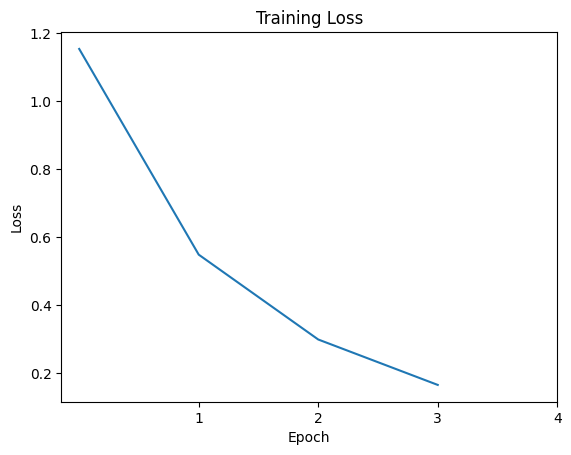

In [ ]:
df_stats = pd.DataFrame(data=training_stats)
plt.plot(df_stats['Training Loss'], label="Training")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([1, 2, 3, 4])
plt.show()

In [ ]:
test_contents = test.content.values
test_labels = test.encoded_categories.values

input_ids = []
attention_masks = []

for text in test_contents:
    encoded_dict = tokenizer.encode_plus(
                        text,                     
                        add_special_tokens = True, 
                        max_length = max_len,          
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',   
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels)

batch_size = 32  

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print('Prediction started on test data')
model.eval()
predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  predictions.append(logits)
  true_labels.append(label_ids)

print('Prediction completed')

prediction_set = []

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  prediction_set.append(pred_labels_i)

prediction_scores = [item for sublist in prediction_set for item in sublist]

Prediction started on test data
Prediction completed


In [ ]:
f_score = f1_score(test_labels, prediction_scores, average='macro')
precision = precision_score(test_labels, prediction_scores, average='macro')
recall = recall_score(test_labels, prediction_scores, average='macro')

print("F-Score: ", f_score)
print("Recall: ", recall)
print("Precision: ", precision)

report = pd.DataFrame(classification_report(test_labels, prediction_scores, output_dict=True))
report = report.rename(columns={'0':'NO_OFFENSIVE',
                          '1':'OFFENSIVE',
                          '2':'RACIST',
                          '3':'PROFANITY',
                          '4':'INSULT',
                          '5':'SEXIST',
                               })

print(report)

F-Score:  0.7118135855547955
Recall:  0.7120008223418641
Precision:  0.7118876303913183
           NO_OFFENSIVE   OFFENSIVE      RACIST   PROFANITY      INSULT  \
precision      0.747984    0.823529    0.935484    0.864796    0.899533   
recall         0.774530    0.821229    0.915789    0.834975    0.925481   
f1-score       0.761026    0.822378    0.925532    0.849624    0.912322   
support      479.000000  716.000000  475.000000  406.000000  416.000000   

           SEXIST  accuracy    macro avg  weighted avg  
precision     0.0  0.848898     0.711888      0.848737  
recall        0.0  0.848898     0.712001      0.848898  
f1-score      0.0  0.848898     0.711814      0.848679  
support       3.0  0.848898  2495.000000   2495.000000  
